<a href="https://colab.research.google.com/github/ronaldodeschain/rd_colab/blob/main/Introdu%C3%A7%C3%A3o_a_Machine_Learning_Otimiza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install graphviz==-0.9
!pip install pydot

!apt-get install graphviz

ERROR: Could not find a version that satisfies the requirement graphviz==-0.9 (from versions: 0.1, 0.1.1, 0.2, 0.2.1, 0.2.2, 0.3, 0.3.1, 0.3.2, 0.3.3, 0.3.4, 0.3.5, 0.4, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.5, 0.4.6, 0.4.7, 0.4.8, 0.4.9, 0.4.10, 0.5, 0.5.1, 0.5.2, 0.6, 0.7, 0.7.1, 0.8, 0.8.1, 0.8.2, 0.8.3, 0.8.4, 0.9, 0.10, 0.10.1, 0.11, 0.11.1, 0.12, 0.13, 0.13.1, 0.13.2, 0.14, 0.14.1, 0.14.2, 0.15, 0.16, 0.17, 0.18, 0.18.1, 0.18.2, 0.19, 0.19.1, 0.19.2, 0.20, 0.20.1)
ERROR: No matching distribution found for graphviz==-0.9
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [6]:
# gerando dados aleatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [7]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [11]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [9]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


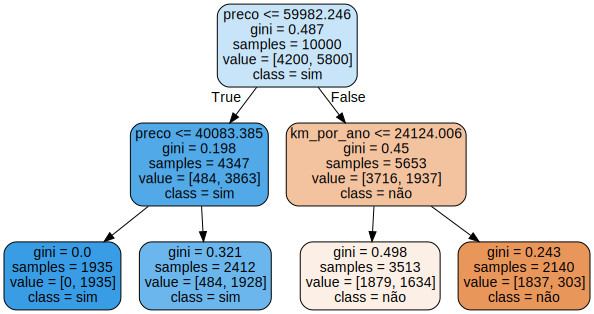

In [10]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar,y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None,filled=True,rounded=True,
                class_names=["não","sim"],
                           feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [12]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() *100
  test_score = results['test_score'].mean()*100
  print("Arvore max_depth = %d,treino = %.2f, teste = %.2f" % (max_depth,train_score, test_score))
  imprime_resultados(results)
  tabela = [max_depth,train_score,test_score]
  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados,columns= ["max_depth","train","test"])
resultados.head()


Arvore max_depth = 1,treino = 75.79, teste = 75.78
Accuracy médio 75.78
Intervalo [73.67, 77.90]
Arvore max_depth = 2,treino = 75.79, teste = 75.78
Accuracy médio 75.78
Intervalo [73.67, 77.90]
Arvore max_depth = 3,treino = 78.75, teste = 78.67
Accuracy médio 78.67
Intervalo [76.40, 80.94]
Arvore max_depth = 4,treino = 78.79, teste = 78.63
Accuracy médio 78.63
Intervalo [76.41, 80.86]
Arvore max_depth = 5,treino = 78.94, teste = 78.56
Accuracy médio 78.56
Intervalo [76.42, 80.69]
Arvore max_depth = 6,treino = 79.17, teste = 78.12
Accuracy médio 78.12
Intervalo [75.53, 80.72]
Arvore max_depth = 7,treino = 79.50, teste = 77.96
Accuracy médio 77.96
Intervalo [75.74, 80.19]
Arvore max_depth = 8,treino = 79.89, teste = 77.86
Accuracy médio 77.86
Intervalo [75.81, 79.91]
Arvore max_depth = 9,treino = 80.46, teste = 77.38
Accuracy médio 77.38
Intervalo [75.28, 79.48]
Arvore max_depth = 10,treino = 81.16, teste = 77.19
Accuracy médio 77.19
Intervalo [75.26, 79.13]
Arvore max_depth = 11,treino 

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


<Axes: xlabel='max_depth', ylabel='train'>

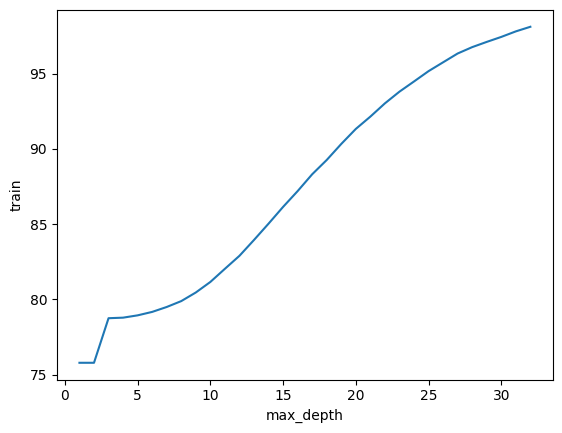

In [13]:
import seaborn as sns

sns.lineplot(x= "max_depth",y= "train",data = resultados)

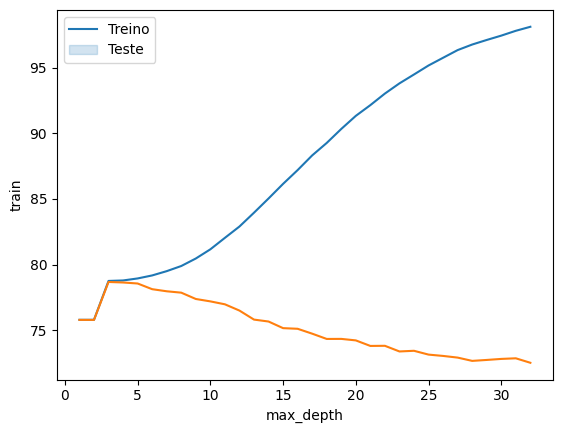

In [14]:
#overfit
import matplotlib.pyplot as plt
sns.lineplot(x= "max_depth",y= "train",data = resultados)
sns.lineplot(x="max_depth",y="test",data=resultados)
plt.legend(["Treino","Teste"])

In [15]:
resultados.sort_values("test",ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185
